<a href="https://colab.research.google.com/github/StMaCre/french_song_level_analysis/blob/main/Chansons_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!pip install langdetect
!python -m spacy download fr_dep_news_trf

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import re
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
from collections import Counter

In [3]:
#Download spacy French object
nlp = spacy.load("fr_dep_news_trf")

# File reading and cleaning

In [4]:
# Create the dataframe with all the songs
df = pd.read_csv("final_genres.csv", sep=",")
# Drop uneeded columns
df = df.drop("Unnamed: 0", axis = 1)
# Clean the lyrics
df["text"] = df['final'].str.replace(r"<.*>", '', regex=True)
df["text"] = df["text"].str.replace(r"\d", " ", regex=True)
df["text"] = df["text"].str.replace(r"aa+h*a?h?|^o+h+"," ", regex=True)
df["text"] = df["text"].str.replace(r"\n", " ", regex=True)
df["text"] = df["text"].str.replace(r"[,.?!;'´-]", " ", regex=True)
df["text"] = df["text"].str.replace(r"(&nbsp)", " ", regex=True)
df.drop(['final'], axis=1, inplace=True)
# Select only a small sample (unecomment if you want to test on the first few rows)
#df = df.drop(df.index[6:])

In [7]:
df

,index,artist,title,album,genre,text
0,0,Willy William,Ego lyrics,Album: Une seule vie (Collector),electro,Miroir Dis moi qui est le plus beau Quitte à...
1,1,Indila,Dernière danse lyrics,Album: Mini World (2014),pop,Oh ma douce souffrance Pourquoi s’acharner t...
2,2,Zaz,Je veux lyrics,Album: Zaz (2010),pop,Donnez moi une suite au Ritz je n en veux pas...
3,3,Carla Bruni,Quelqu'un m'a dit lyrics,Album: Quelqu'un m'a dit (2002),"pop,chanson francaise",On me dit que nos vies ne valent pas grand cho...
4,4,Stromae,Formidable lyrics,Racine carrée (2013),"pop,electro",Tu étais formidable j étais fort minable Nous...
...,...,...,...,...,...,...
4877,4995,L5,Deconnecter lyrics,NaN,pop,Est ce qu il faut que je signe de longs contra...
4878,4996,Francis Cabrel,Le temps s'en allait lyrics,NaN,"pop,chanson francaise",Ce matin j ai joué aux billes J ai couru les ...
4879,4997,Édith Piaf,C'est lui que mon cœur a choisi lyrics,NaN,chanson francaise,Je m rappelle plus comment on s était rencontr...
4880,4998,Tereza Kesovija,Quand j'irai vers l'or lyrics,NaN,NaN,Y aura des poissons d argents plein les rivièr...


# Getting rid of songs that are not in French

In [8]:
# Recognize language of the songs 
from langdetect import DetectorFactory, detect
from langdetect.lang_detect_exception import LangDetectException

In [9]:
# Check wether the text is in French or not return True/False
def is_french(text):
    try:
        if detect(text) != "fr":
            return False
    except TypeError:
      return 'Error'
    except LangDetectException:
        return False
    return True

In [10]:
# Add a column which note if the song is in French or not
df['french'] = df['text'].apply(is_french)
# Drop the songs that are not 
df.drop(df[df["french"] == False].index, inplace=True)

In [11]:
df = df.drop(['french'], axis=1)

# Adding the word count 
This will help us to get the percentage of words of a certain level in a song. 
As well, it would be interesting to know which genre has the longest kind of songs. 

In [12]:
def count_words(text):
  return len(str(text).split())

In [13]:
df['word_count'] = df['text'].apply(count_words)

In [14]:
df

,index,artist,title,album,genre,text,word_count
0,0,Willy William,Ego lyrics,Album: Une seule vie (Collector),electro,Miroir Dis moi qui est le plus beau Quitte à...,174
1,1,Indila,Dernière danse lyrics,Album: Mini World (2014),pop,Oh ma douce souffrance Pourquoi s’acharner t...,266
2,2,Zaz,Je veux lyrics,Album: Zaz (2010),pop,Donnez moi une suite au Ritz je n en veux pas...,211
3,3,Carla Bruni,Quelqu'un m'a dit lyrics,Album: Quelqu'un m'a dit (2002),"pop,chanson francaise",On me dit que nos vies ne valent pas grand cho...,198
4,4,Stromae,Formidable lyrics,Racine carrée (2013),"pop,electro",Tu étais formidable j étais fort minable Nous...,313
...,...,...,...,...,...,...,...
4877,4995,L5,Deconnecter lyrics,NaN,pop,Est ce qu il faut que je signe de longs contra...,228
4878,4996,Francis Cabrel,Le temps s'en allait lyrics,NaN,"pop,chanson francaise",Ce matin j ai joué aux billes J ai couru les ...,371
4879,4997,Édith Piaf,C'est lui que mon cœur a choisi lyrics,NaN,chanson francaise,Je m rappelle plus comment on s était rencontr...,347
4880,4998,Tereza Kesovija,Quand j'irai vers l'or lyrics,NaN,NaN,Y aura des poissons d argents plein les rivièr...,302


# Lemmatizing the songs

In [15]:
# Create function to lemmatize each lyric in the dataframe 
def lemmatize_song(row):
  text = [] 
  doc = nlp(row)
  for token in doc:
    try: 
      text.append(token.lemma_)
    except AttributeError:
      continue
  return text

In [16]:
df['text']= df['text'].astype(str)
df["lemmatized"] = df["text"].apply(lemmatize_song)

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [17]:
df

,index,artist,title,album,genre,text,word_count,lemmatized
0,0,Willy William,Ego lyrics,Album: Une seule vie (Collector),electro,Miroir Dis moi qui est le plus beau Quitte à...,174,"[miroir, , dire, moi, qui, être, le, plus, be..."
1,1,Indila,Dernière danse lyrics,Album: Mini World (2014),pop,Oh ma douce souffrance Pourquoi s’acharner t...,266,"[Oh, mon, doux, souffrance, , pourquoi, s’, ..."
2,2,Zaz,Je veux lyrics,Album: Zaz (2010),pop,Donnez moi une suite au Ritz je n en veux pas...,211,"[donner, moi, un, suite, au, Ritz, , je, n, e..."
3,3,Carla Bruni,Quelqu'un m'a dit lyrics,Album: Quelqu'un m'a dit (2002),"pop,chanson francaise",On me dit que nos vies ne valent pas grand cho...,198,"[on, me, dire, que, notre, vie, ne, valoir, pa..."
4,4,Stromae,Formidable lyrics,Racine carrée (2013),"pop,electro",Tu étais formidable j étais fort minable Nous...,313,"[tu, être, formidable, , j, être, fort, minab..."
...,...,...,...,...,...,...,...,...
4877,4995,L5,Deconnecter lyrics,NaN,pop,Est ce qu il faut que je signe de longs contra...,228,"[être, ce, qu, il, falloir, que, je, signe, de..."
4878,4996,Francis Cabrel,Le temps s'en allait lyrics,NaN,"pop,chanson francaise",Ce matin j ai joué aux billes J ai couru les ...,371,"[ce, matin, j, avoir, jouer, à, bille, , j, a..."
4879,4997,Édith Piaf,C'est lui que mon cœur a choisi lyrics,NaN,chanson francaise,Je m rappelle plus comment on s était rencontr...,347,"[je, m, rappeler, plus, comment, on, s, être, ..."
4880,4998,Tereza Kesovija,Quand j'irai vers l'or lyrics,NaN,NaN,Y aura des poissons d argents plein les rivièr...,302,"[y, avoir, un, poisson, d, argent, plein, le, ..."


# Understanding the data 

In [18]:
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
import collections
import matplotlib
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
from matplotlib.text import Text

In [46]:
# Getting rid of the na
df = df[df['text'].notna()]
df = df[df['text'] != 'nan']
df = df.reset_index()
df = df.drop(["index"], axis=1)
#df= df.drop(['level_0'],axis=1)

In [19]:
# Correcting a mistake that was in the DF 
df['genre'].replace({'comedie musicale/film,comedie musicale/film':'comedie musicale/film'}, inplace=True)

## Wordcloud

In [20]:
stop_words = list(fr_stop)
stop_words = stop_words + ['j', 'l', 'd', 'qu', 'c', 't', 'm', 'n', 's', "c'est", ':', "»", "«"]

In [21]:
wordcount = {}
def count_word(text):
  for word in text.lower().split():
      if word not in stop_words:
          if word not in wordcount:
              wordcount[word] = 1
          else:
              wordcount[word] += 1

In [24]:
df['text'].apply(count_word)

0       None
1       None
2       None
3       None
4       None
        ... 
4877    None
4878    None
4879    None
4880    None
4881    None
Name: text, Length: 4789, dtype: object

In [26]:
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(100):
  print(word, ": ", count)

vie :  8448
amour :  8090
rien :  7114
oh :  6738
bien :  6616
faire :  5686
temps :  5470
aime :  5376
veux :  5286
sais :  5182
jour :  4770
jamais :  4586
monde :  4562
trop :  4318
cœur :  4270
non :  3704
c’est :  3428
dis :  3416
yeux :  3380
faut :  3256
nuit :  3196
mal :  3010
oui :  2762
fois :  2628
loin :  2538
vois :  2426
voir :  2388
terre :  2228
ciel :  2194
j’ai :  2176
peur :  2156
laisse :  2098
viens :  2092
belle :  2086
soir :  2072
soleil :  2012
beau :  2004
vivre :  1936
bras :  1908
ici :  1904
mots :  1876
tête :  1846
aimer :  1822
crois :  1816
danse :  1782
corps :  1758
sens :  1714
grand :  1710
petit :  1704
histoire :  1614
coeur :  1590
main :  1568
passe :  1560
vent :  1540
rêve :  1532
bon :  1510
donne :  1496
rêves :  1496
homme :  1472
jours :  1454
fond :  1434
mieux :  1428
mort :  1404
bonheur :  1402
fort :  1390
ouais :  1384
dieu :  1360
veut :  1360
oublie :  1360
demain :  1356
besoin :  1332
air :  1330
aller :  1308
fille :  1304
voix

In [ ]:
plt.figure(figsize=[20,10])
plt.imshow(wc)
plt.axis('off')
plt.show()

## Songs per singers

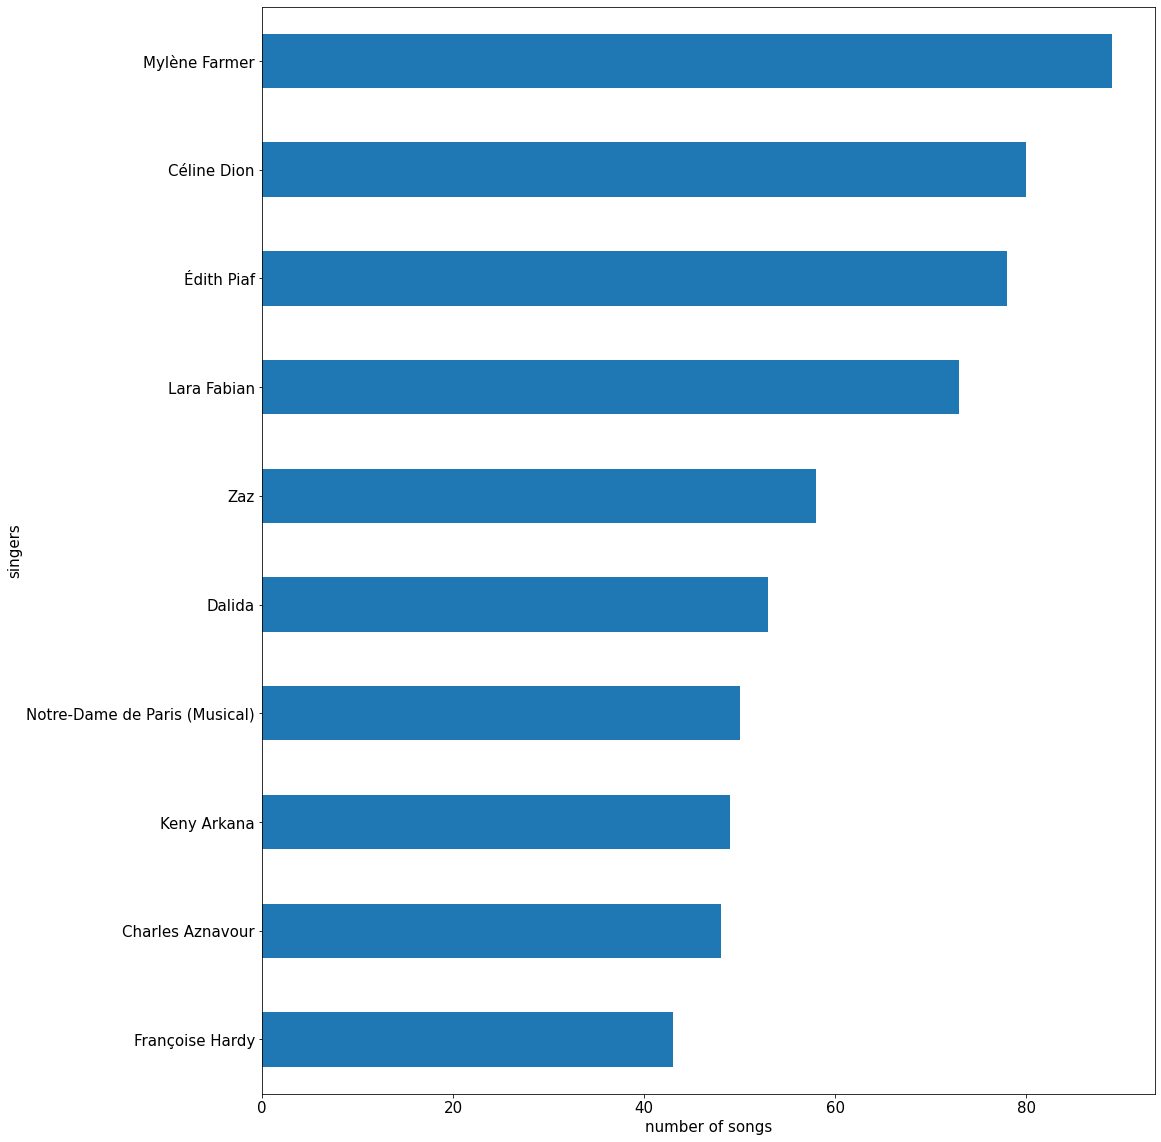

In [49]:
font = {'family' : 'normal',
        'size'   : 15}
matplotlib.rc('font', **font)
fig, ax = plt.subplots()
df['artist'].value_counts()[0:10].plot(kind='barh', figsize=(16, 20))
ax.invert_yaxis()
plt.xlabel('number of songs')
plt.ylabel('singers')
plt.show()

## Word count 

In [37]:
genre_rank_words = df.groupby('genre')['word_count'].mean().sort_values()

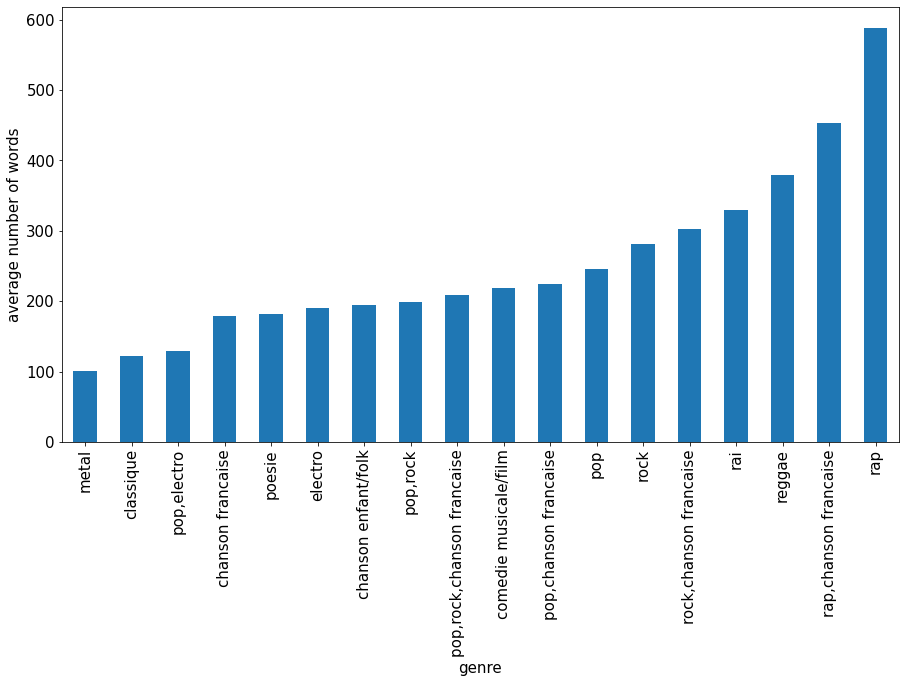

In [50]:
genre_rank_words.plot(kind = "bar", figsize= (15, 8))
plt.xlabel('genre')
plt.ylabel('average number of words')
plt.show()

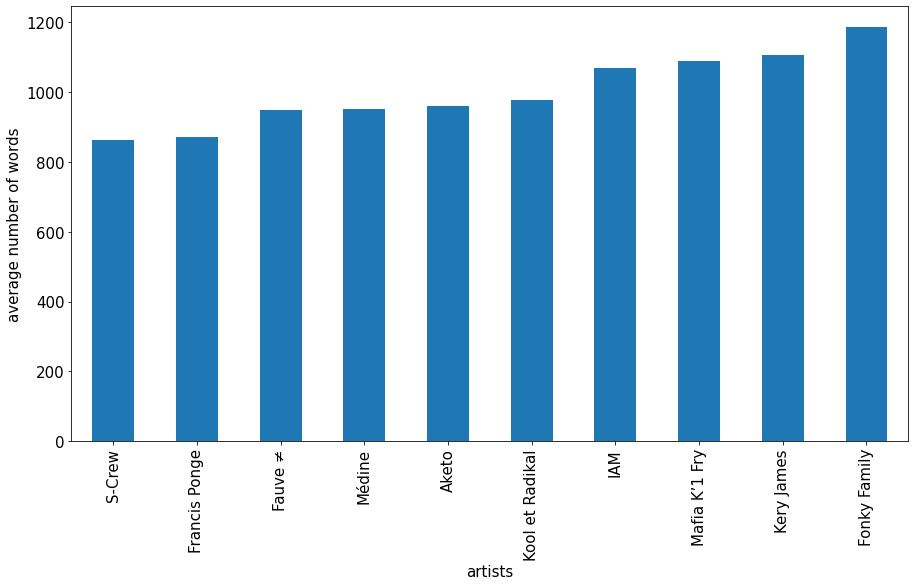

In [51]:
artist_rank_words = df.groupby('artist')['word_count'].mean().sort_values()
artist_rank_words[-10:].plot(kind = "bar", figsize= (15, 8))
plt.xlabel('artists')
plt.ylabel('average number of words')
plt.show()

In [52]:
artist_rank_words

artist
Armin van Buuren         11.000000
Nine Inch Nails          32.000000
Alexandrina Hristov      34.000000
Nico                     36.000000
Morten Lauridsen         37.000000
                          ...     
Kool et Radikal         978.000000
IAM                    1068.166667
Mafia K’1 Fry          1089.000000
Kery James             1105.571429
Fonky Family           1186.000000
Name: word_count, Length: 1143, dtype: float64

# Getting the list of words per level

In [67]:
# Reading into dfs the list of words
  # Memrise one
df_words = pd.read_csv("words.csv")
df_words = df_words.drop("Unnamed: 0", axis = 1)
  # Frequency one
df_frequence = pd.read_csv("frequence_mots.csv", sep= ";")
df_frequence = df_frequence.drop(["Unnamed: 3", "Unnamed: 4", "Fréquence"], axis = 1)
# Cleaning the lists from unnecessary article
df_words["word_no_dt"] = df_words['word'].str.replace(r"^une\s|^un\s|^un/une\s|^des\s", '', regex=True)
total_memrize = df_words["word_no_dt"].tolist()
total_freq = df_frequence["Mot"].tolist()
# Adding the frequency list to A1, A2 and B1
A1 = total_freq[0:600]
A2 = total_freq[601:1201]
B1 = total_freq[1202:]
B2 = []
# Getting rid of the words that are already in the other lists
memrize_without_freq = [x for x in total_memrize if x not in total_freq]
# Completing the B1 and B2 with the Memrise list cleaned 
B1= B1 + memrize_without_freq[0:1040]
B2 = memrize_without_freq[1040:-131]
C = memrize_without_freq[-131:]

In [68]:
print(len(A1), len(A2), len(B1), len(B2))
print(len(A1) + len(A2) + len(B1) + len(B2))

600 600 1300 2500
5000


# Classification

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
import scipy.sparse

In [58]:
def normalise(text):
  new = ' '.join(text)
  return new 

In [59]:
df['normalised'] = df['lemmatized'].apply(normalise)

In [61]:
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(df["normalised"])
count_array = count_matrix.toarray()
df_table = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())

In [62]:
df_dtm = df_table.T
df_dtm = df_dtm.reset_index(level=0)
df_dtm = df_dtm.rename(columns={"index": "word"})
print(df_dtm)

              word  0  1  2  3  4  5  6  7  8  ...  4622  4623  4624  4625  \
0               aa  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
1              aah  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
2            aahhh  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
3          aaliyah  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
4            aasma  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
...            ... .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   
26546          該愛的  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
26547          該說的  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
26548  讓那擁抱不停的延續下去  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
26549          開心的  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
26550          雨下了  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   

       4626  4627  4628  4629  4630  4631  
0         0     0  

In [69]:
df_dtm["level"] = None
for i in range(len(df_dtm.index)): 
  for word in A1: 
    if df_dtm["word"].iloc[i] == word:
      df_dtm["level"].iloc[i] = "A1"
      break 
  for word in A2: 
    if df_dtm["word"].iloc[i] == word: 
      df_dtm["level"].iloc[i] = "A2"
      break
  for word in B1: 
    if df_dtm["word"].iloc[i] == word:
      df_dtm["level"].iloc[i] = "B1"
      break 
  for word in B2: 
    if df_dtm["word"].iloc[i] == word:
      df_dtm["level"].iloc[i] = "B2"
      break    

In [70]:
df_level = df_dtm.groupby(by="level").sum()
print(df_level)

       0     1     2     3     4     5     6     7     8     9     ...  4622  \
level                                                              ...         
A1      115   171   144   143   193   172   332   138    60    70  ...   139   
A2       11    28    24    15    17    24    66    31     5     9  ...    38   
B1        7     3     8     3     6     9    11    10     1     2  ...     8   
B2        4    26     7     4    45     5     9     4     7     5  ...     8   

       4623  4624  4625  4626  4627  4628  4629  4630  4631  
level                                                        
A1      128   156   140    65   154   259   222   149    64  
A2       39    25    15    10    15    25    25    44    17  
B1        8     7     6    10     2    13    17    28     3  
B2        1     7    10     8     3     4     0    15     3  

[4 rows x 4632 columns]


In [ ]:
# Around 9 min
# Create a dictionary with the percentage of words of each level for each songs
songs_percentage = {}
i =0 
while i < len(df):
  songs_percentage[i] = []
  for row in df_level[i]: 
    songs_percentage[i].append((row/df.loc[i]['word_count'])*100)
  i += 1

In [93]:
percentage = pd.DataFrame.from_dict(songs_percentage)
percentage = percentage.T
percentage = percentage.rename(columns={0: "A1", 1: "A2", 2:"B1", 3:"B2"})
df_complete = df.join(percentage)
df_complete['A']= df_complete['A1'] + df_complete['A2']
df_complete['A + B']= df_complete['A1'] + df_complete['A2'] + df_complete['B1'] + df_complete['B2']
df_easiest = df_complete.sort_values("A1", ascending=False)
df_medium = df_complete.sort_values("A", ascending = False)
df_hardest = df_complete.sort_values("A + B", ascending = False)

In [94]:
top_50_A1 = []
for x in range(50):
  title = df_easiest.iloc[x]['title']
  artiste = df_easiest.iloc[x]['artist']
  genre = df_easiest.iloc[x]["genre"]
  top_50_A1.append(str(title) + " de " + str(artiste) + " genre = " + str(genre))

top_50_A1

['Il faut manger lyrics de Manu Chao genre = pop',
 "Qu'avons-nous fait de vous\u202f? lyrics de Le Roi Soleil (Comédie Musicale) genre = comedie musicale/film",
 'La poupée qui fait non lyrics de Mylène Farmer genre = pop,chanson francaise',
 'Elle lyrics de Melissa M genre = nan',
 'Tu me manques (Missing You) lyrics de Mia Martina genre = nan',
 'Reste-là lyrics de Keren Ann genre = pop,chanson francaise',
 'Tu te reconnaîtras lyrics de Anne-Marie David genre = nan',
 'Attendre lyrics de Céline Dion genre = pop,chanson francaise',
 'Que sont devenues les fleurs lyrics de Dalida genre = pop',
 'Soleil Soleil lyrics de Nana Mouskouri genre = pop',
 'Tout au bout de nos peines lyrics de Isabelle Boulay genre = pop',
 'Seul lyrics de Madame Kay genre = pop,rock',
 'Tout de moi lyrics de Andrée Watters genre = pop',
 'Je reviens lyrics de Autour de Lucie genre = rock',
 'Tu Te Reconnaitras lyrics de Elsa genre = nan',
 "Ne m'oublie pas [Remember Me] lyrics de Coco (OST) genre = comedie m

In [78]:
top_medium = pd.merge(df_easiest[0:50], df_medium[0:100], on= ['title', 'artist', 'genre'], how='outer', indicator = True).query('_merge=="right_only"')
top_50_A2 = []
for x in range(50):
  title = top_medium.iloc[x]['title']
  artiste = top_medium.iloc[x]['artist']
  genre = top_medium.iloc[x]["genre"]
  top_50_A2.append(str(title) + " de " + str(artiste) + " genre = " + str(genre))

top_50_A2

['Je te laisserai des mots lyrics de Patrick Watson genre = nan',
 'Qu’est-ce que c’est? lyrics de Téléfrançais genre = comedie musicale/film',
 'Pas avec toi lyrics de Plastiscines genre = nan',
 'Pour une fois lyrics de Marie-Mai genre = pop',
 "L'intranquilité lyrics de Louise Attaque genre = pop,rock,chanson francaise",
 'Te passe pas de moi lyrics de Judith (France) genre = nan',
 'Tu me manques lyrics de Sheryfa Luna genre = pop',
 'Ici maintenant lyrics de Marie-Mai genre = pop',
 'Le temps des fleurs lyrics de Vicky Leandros genre = pop',
 'Tes yeux noirs lyrics de Indochine genre = pop,rock,chanson francaise',
 'Fais ce que tu voudras lyrics de Céline Dion genre = pop,chanson francaise',
 'Sous le vent lyrics de Garou genre = pop,chanson francaise',
 'Tu dis rien lyrics de Louise Attaque genre = pop,rock,chanson francaise',
 'En hiver lyrics de Marie-Mai genre = pop',
 'Une femme amoureuse lyrics de Mireille Mathieu genre = chanson francaise',
 'Dans un autre monde [Into the U

In [85]:
top_hard = pd.merge(df_medium[0:150], df_hardest[0:200], on= ['title', 'artist', 'genre'], how='outer', indicator = True).query('_merge=="right_only"')
top_50_B = []
for x in range(50):
  title = top_hard.iloc[x]['title']
  artiste = top_hard.iloc[x]['artist']
  genre = top_hard.iloc[x]['genre']
  top_50_B.append(str(title) + " de " + str(artiste) + " genre = " + str(genre))

top_50_B

['Ne partez pas sans moi lyrics de Céline Dion genre = pop,chanson francaise',
 'Si la vie est cadeau lyrics de Corinne Hermès genre = nan',
 'Mon Dieu lyrics de Édith Piaf genre = chanson francaise',
 'La taille de mon âme lyrics de Daniel Darc genre = nan',
 'Maman me dit lyrics de Angélina (France) genre = nan',
 'Écoutez le cœur des gens lyrics de Daniel B genre = nan',
 'Un ange est tombé lyrics de Lara Fabian genre = pop',
 'Ce que je sais lyrics de Johnny Hallyday genre = pop,rock',
 'Pourquoi tu vis et où tu vas lyrics de Jeanette genre = nan',
 'Open My Eyes lyrics de Reuben Morgan genre = nan',
 'Ma référence lyrics de Jena Lee genre = pop',
 'Le verger aux petits lyrics de Bastien Lallemant genre = chanson francaise',
 'La Même Histoire lyrics de Feist genre = nan',
 "Celle qui m'a tout appris lyrics de Céline Dion genre = pop,chanson francaise",
 "Répondez-moi lyrics de Gjon's Tears genre = nan",
 'Les neiges du Kilimanjaro lyrics de Pascal Danel genre = nan',
 "Faut recomm

In [86]:
df_most_A = df_complete.sort_values("A", ascending=False)

In [97]:
df_complete["A_round"] = df_complete['A'].apply(round)
df_complete["AB_round"] = df_complete['A + B'].apply(round)

In [98]:
df_count_A = df_complete.groupby("A_round")['title'].count()
df_count_AB = df_complete.groupby("AB_round")['title'].count()

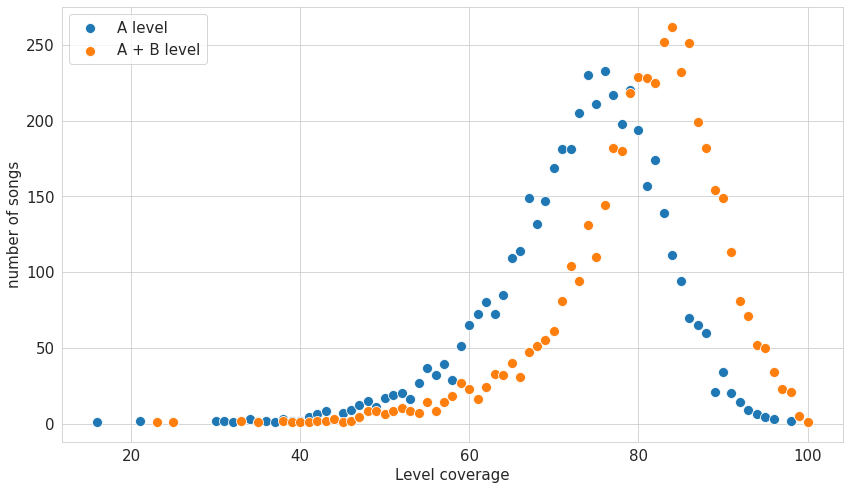

In [99]:
#Number of songs per percentage of A 
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 8))
ax1 = sns.scatterplot(data=df_count_A, s=100, ax=ax, palette="deep", label='A level')
ax2 = sns.scatterplot(data=df_count_AB, s=100, ax=ax, palette="deep", label='A + B level')
plt.legend(loc='upper left');
plt.xlabel('Level coverage')
plt.ylabel('number of songs')
plt.show()

In [100]:
df_complete

,artist,title,album,genre,text,word_count,lemmatized,normalised,A1,A2,B1,B2,A,A + B,A_round,AB_round
0,Willy William,Ego lyrics,Album: Une seule vie (Collector),electro,Miroir Dis moi qui est le plus beau Quitte à...,174,"[miroir, , dire, moi, qui, être, le, plus, be...",miroir dire moi qui être le plus beau quit...,66.091954,6.321839,4.022989,2.298851,72.413793,78.735632,72,79
1,Indila,Dernière danse lyrics,Album: Mini World (2014),pop,Oh ma douce souffrance Pourquoi s’acharner t...,266,"[Oh, mon, doux, souffrance, , pourquoi, s’, ...",Oh mon doux souffrance pourquoi s’ acharner...,64.285714,10.526316,1.127820,9.774436,74.812030,85.714286,75,86
2,Zaz,Je veux lyrics,Album: Zaz (2010),pop,Donnez moi une suite au Ritz je n en veux pas...,211,"[donner, moi, un, suite, au, Ritz, , je, n, e...",donner moi un suite au Ritz je n en vouloir ...,68.246445,11.374408,3.791469,3.317536,79.620853,86.729858,80,87
3,Carla Bruni,Quelqu'un m'a dit lyrics,Album: Quelqu'un m'a dit (2002),"pop,chanson francaise",On me dit que nos vies ne valent pas grand cho...,198,"[on, me, dire, que, notre, vie, ne, valoir, pa...",on me dire que notre vie ne valoir pas grand c...,72.222222,7.575758,1.515152,2.020202,79.797980,83.333333,80,83
4,Stromae,Formidable lyrics,Racine carrée (2013),"pop,electro",Tu étais formidable j étais fort minable Nous...,313,"[tu, être, formidable, , j, être, fort, minab...",tu être formidable j être fort minable nous ...,61.661342,5.431310,1.916933,14.376997,67.092652,83.386581,67,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4627,L5,Deconnecter lyrics,NaN,pop,Est ce qu il faut que je signe de longs contra...,228,"[être, ce, qu, il, falloir, que, je, signe, de...",être ce qu il falloir que je signe de long con...,67.543860,6.578947,0.877193,1.315789,74.122807,76.315789,74,76
4628,Francis Cabrel,Le temps s'en allait lyrics,NaN,"pop,chanson francaise",Ce matin j ai joué aux billes J ai couru les ...,371,"[ce, matin, j, avoir, jouer, à, bille, , j, a...",ce matin j avoir jouer à bille j avoir couri...,69.811321,6.738544,3.504043,1.078167,76.549865,81.132075,77,81
4629,Édith Piaf,C'est lui que mon cœur a choisi lyrics,NaN,chanson francaise,Je m rappelle plus comment on s était rencontr...,347,"[je, m, rappeler, plus, comment, on, s, être, ...",je m rappeler plus comment on s être rencontre...,63.976945,7.204611,4.899135,0.000000,71.181556,76.080692,71,76
4630,Tereza Kesovija,Quand j'irai vers l'or lyrics,NaN,NaN,Y aura des poissons d argents plein les rivièr...,302,"[y, avoir, un, poisson, d, argent, plein, le, ...",y avoir un poisson d argent plein le rivière ...,49.337748,14.569536,9.271523,4.966887,63.907285,78.145695,64,78


# Classification by artists

In [101]:
level_artist_rank = df_complete.groupby('artist')["A + B"].mean().sort_values()

In [103]:
level_artist_rank.sort_values(ascending=False)[0:50]

artist
Patrick Watson                            100.000000
Andrée Watters                             99.319728
Corinne Hermès                             98.709677
Daniel Darc                                98.324022
Daniel B                                   98.214286
Anne-Marie David                           97.794118
Reuben Morgan                              97.402597
Bastien Lallemant                          97.142857
Feist                                      97.037037
Léopold Sédar Senghor                      96.078431
Seemone                                    95.721925
Maëlle                                     94.849785
Claire Pérot                               94.736842
Olivier Dion                               94.654528
Jean-Claude Pascal                         94.545455
Donny Montell                              94.535519
Marc Dupré                                 94.439416
Aliose                                     94.416244
Sébastien Perrin                       

# Classification by genre 
Trying to figure out what genre are easiest to learn. 

In [104]:
level_genre_rank = df_complete.groupby('genre')["A + B"].mean().sort_values()

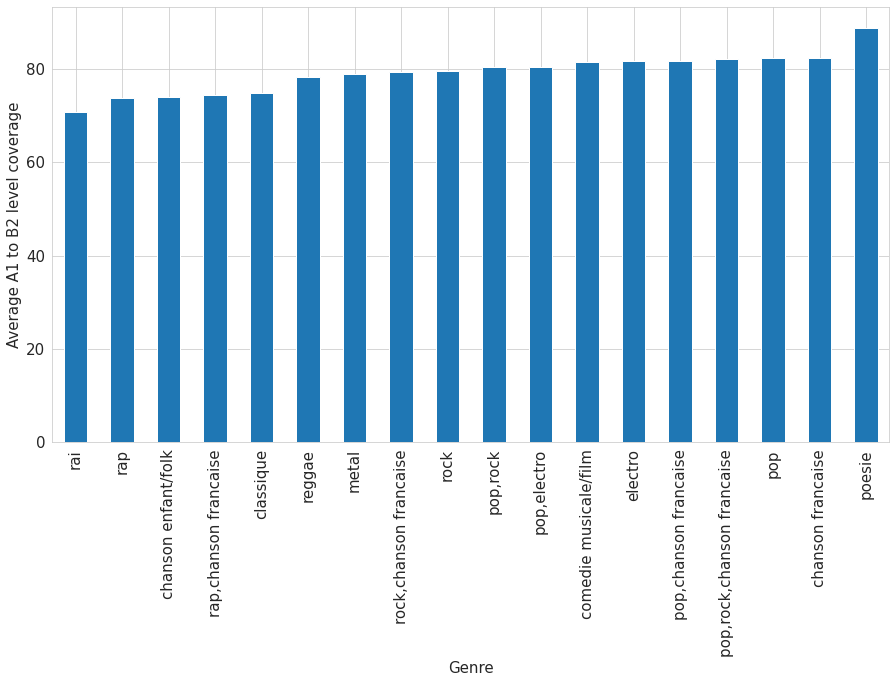

In [112]:
level_genre_rank.plot(kind='bar', figsize=(15, 8))
plt.xlabel('Genre')
plt.ylabel('Average A1 to B2 level coverage')
plt.show()

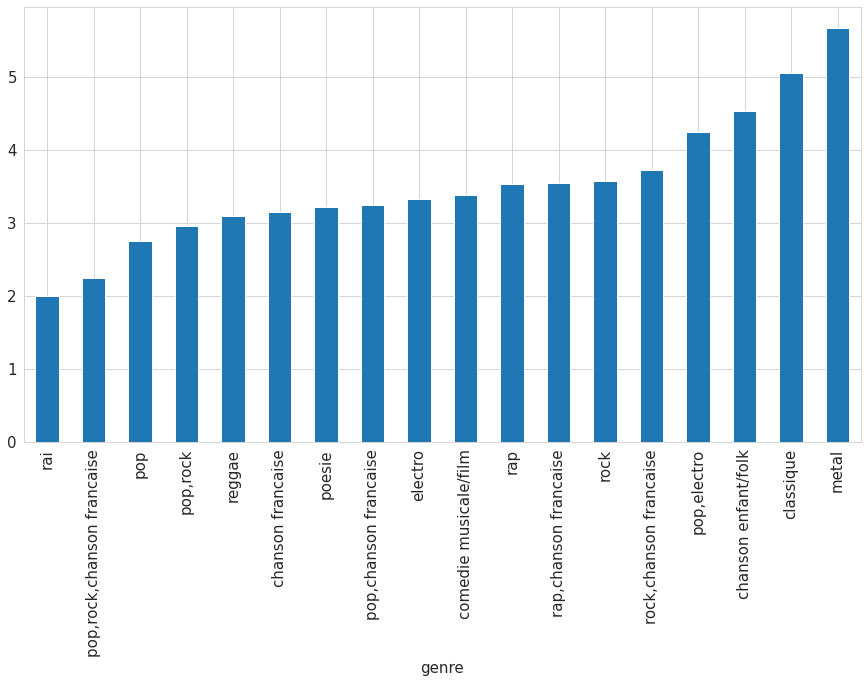

In [106]:
levelB2_genre_rank = df_complete.groupby('genre')["B2"].mean().sort_values()
levelB2_genre_rank.plot(kind='bar', figsize=(15, 8))

In [108]:
df_complete_graph = df_complete[['artist', 'title', 'genre', 'A', 'A + B']]
df_complete_graph.to_csv("df_complete_graph.csv")

In [110]:
df_complete.to_csv('df_complete.csv')